Electricity Usage Project


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data preparation
powerconsumption = pd.read_csv(
    r"C:\Users\anton\Downloads\Electricity+Consumption\powerconsumption.csv", 
    usecols = ["Datetime", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"],
    parse_dates = ["Datetime"]
).assign(
    totalconsumption = lambda x: x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"],
    hour = lambda x: x["Datetime"].dt.hour,
    day = lambda x: x["Datetime"].dt.dayofweek
)
powerconsumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,totalconsumption,hour,day
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


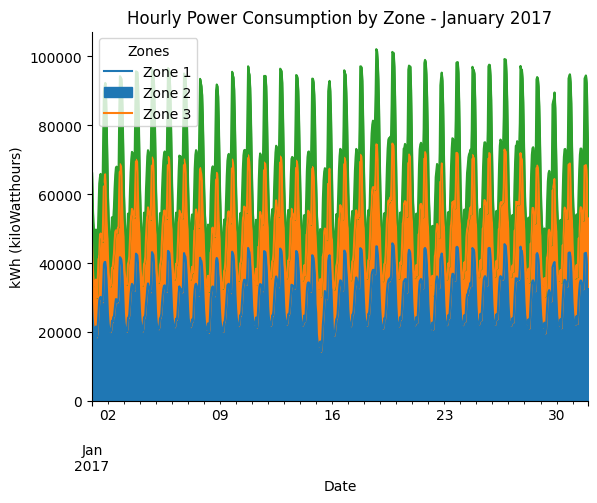

In [65]:
#Visualizing consumption over time
(powerconsumption
 .set_index("Datetime")
 .resample("h")["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
 .mean()
.loc['2017-01']
 .plot
 .area(
     title = "Hourly Power Consumption by Zone - January 2017",
     xlabel = "Date",
     ylabel = "kWh (kiloWatthours)" #unit for electricity usage
 )
)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3'], loc='upper left', title='Zones')
sns.despine() #removing borders

In [90]:
dayofweek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

powerconsumption["dayname"] = pd.Categorical(powerconsumption["Datetime"].dt.day_name(), categories = dayofweek)

In [95]:
#Visualize consumption seasonality
powerconsumption.pivot_table(
    index = "dayname",
    columns = "hour",
    values = "totalconsumption",
    aggfunc = "mean"
)

C:\Users\anton\AppData\Local\Temp\ipykernel_11324\2225107061.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  powerconsumption.pivot_table(


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayname,,,,,,,,,,,,,,,,,,,,,
Monday,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
Tuesday,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
Wednesday,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
Thursday,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
Friday,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
Saturday,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
Sunday,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676


C:\Users\anton\AppData\Local\Temp\ipykernel_11324\440149152.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  powerconsumption.pivot_table(


[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

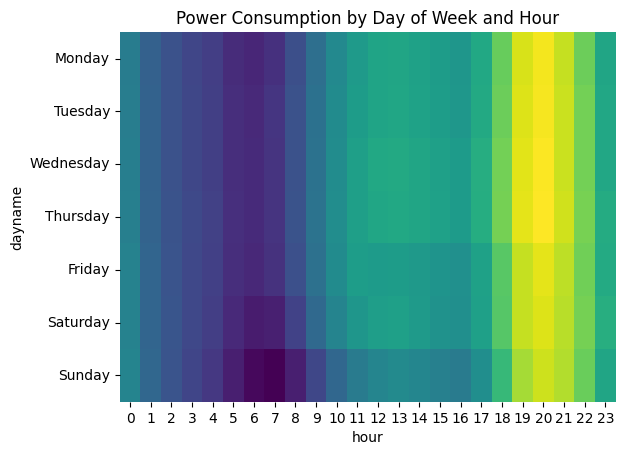

In [93]:
#Heatmap Visualization
sns.heatmap(
   powerconsumption.pivot_table(
    index = "dayname",
    columns = "hour",
    values = "totalconsumption",
    aggfunc = "mean"
),
cbar = None,
cmap = "viridis"
).set(title="Power Consumption by Day of Week and Hour")

In [100]:
#Challenge - find the average consumption on Monday at 1AM
mondaydata = powerconsumption[
(powerconsumption["dayname"] == "Monday") & (powerconsumption["hour"] == 1)
]
avgconsumption = mondaydata["totalconsumption"].mean()
print("The average consumption on Monday at 1AM is: ", avgconsumption, "kWH")

The average consumption on Monday at 1AM is:  61755.42271672756 kWH
